## Proyecto de Generación y Análisis de Hostnames

      hostname       os environment  country  node
0     ATDEU001      AIX     Testing  Germany     1
1     SSESP001  Solaris     Staging    Spain     1
2     SSIRL001  Solaris     Staging  Ireland     1
3     STITA001  Solaris     Testing    Italy     1
4     HPIRL001    HP-UX  Production  Ireland     1
...        ...      ...         ...      ...   ...
1495  APDEU025      AIX  Production  Germany    25
1496  HSFRA007    HP-UX     Staging   France     7
1497  LPESP024    Linux  Production    Spain    24
1498  LTDEU039    Linux     Testing  Germany    39
1499  APDEU026      AIX  Production  Germany    26

[1500 rows x 5 columns]


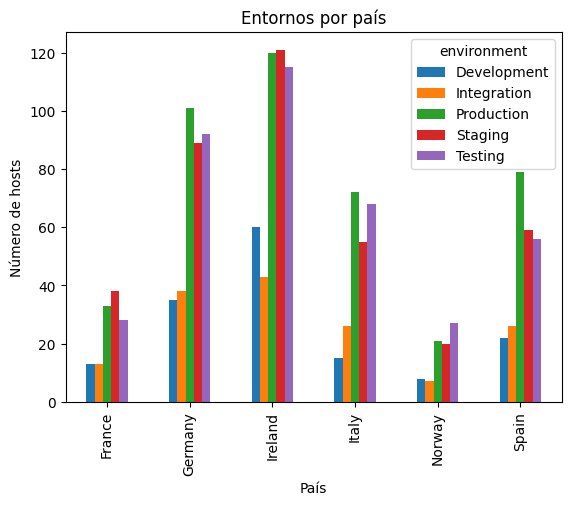

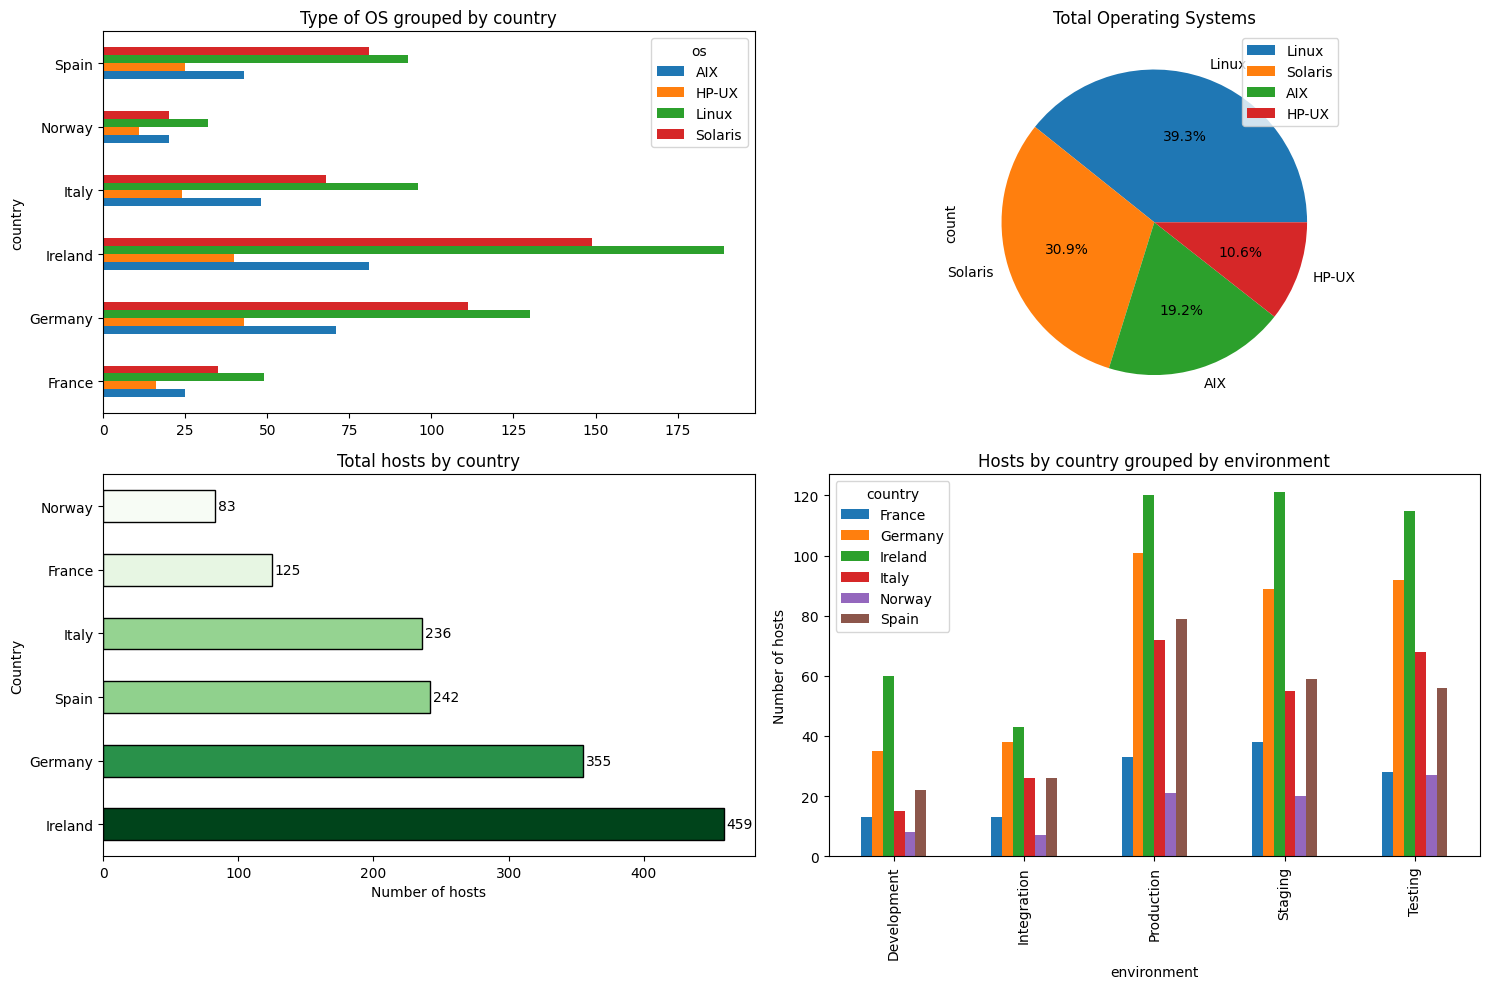

In [ ]:
# Paso 1: Importación de las librerías necesarias
import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Paso 2: Inicializar variable para el DataFrame
# Se inicializa 'dataset' como una lista vacía, para almacenar los datos de hosts
dataset = []
df = None

# Paso 3: Función para generar hostnames
def set_hostnames(number_of_hosts: int):
    """
    Genera una lista de hostnames únicos basados en sistema operativo, entorno y país.
    """
    os_choices, os_weights = ['L', 'S', 'A', 'H'], [0.4, 0.3, 0.2, 0.1]
    env_choices, env_weights = ['D', 'I', 'T', 'S', 'P'], [0.1, 0.1, 0.25, 0.25, 0.3]
    country_choices, country_weights = ['NOR', 'FRA', 'ITA', 'ESP', 'DEU', 'IRL'], [0.06, 0.09, 0.16, 0.16, 0.23, 0.3]
    node_count = {}
    hostnames = []

    for _ in range(number_of_hosts):
        os_letter = random.choices(os_choices, weights=os_weights)[0]
        env_letter = random.choices(env_choices, weights=env_weights)[0]
        country_code = random.choices(country_choices, weights=country_weights)[0]
        key = f"{os_letter}{env_letter}{country_code}"
        node_count[key] = node_count.get(key, 0) + 1
        hostnames.append(f"{key}{node_count[key]:03d}")

    return hostnames

# Paso 4: Función para obtener el nombre del sistema operativo
def get_os(hostname: str):
    """
    Devuelve el sistema operativo basado en el primer carácter del hostname.
    """
    return {'L': 'Linux', 'S': 'Solaris', 'A': 'AIX', 'H': 'HP-UX'}.get(hostname[0], 'Unknown')

# Paso 5: Función para obtener el nombre del entorno
def get_environment(hostname: str):
    """
    Devuelve el entorno basado en el segundo carácter del hostname.
    """
    return {'D': 'Development', 'I': 'Integration', 'T': 'Testing', 'S': 'Staging', 'P': 'Production'}.get(hostname[1], 'Unknown')

# Paso 6: Función para obtener el nombre del país
def get_country(hostname: str):
    """
    Devuelve el país basado en los caracteres 3 a 5 del hostname.
    """
    return {'NOR': 'Norway', 'FRA': 'France', 'ITA': 'Italy', 'ESP': 'Spain', 'DEU': 'Germany', 'IRL': 'Ireland'}.get(hostname[2:5], 'Unknown')

# Paso 7: Crear función para generar el DataFrame
def set_dataframe(count: int):
    """
    Genera un DataFrame con los datos de los hosts.
    """
    global df  # Declaramos df como variable global
    hostnames = set_hostnames(count)
    dataset = [{
        'hostname': hostname,
        'os': get_os(hostname),
        'environment': get_environment(hostname),
        'country': get_country(hostname),
        'node': int(hostname[-3:])
    } for hostname in hostnames]
    df = pd.DataFrame(dataset)

# Paso 8: Invocar la función set_dataframe para generar DataFrame y comprobar
set_dataframe(1500)
print(df)

# Paso 9: Guardar DataFrame en un archivo CSV
df.to_csv("hosts.csv", index=False, header=True)

# Leer el archivo CSV y visualizar
hosts_df = pd.read_csv("hosts.csv")

# Paso 10: Generar gráfico agrupado por país y entorno
grouped_env_country = df.groupby(['country', 'environment']).size().unstack()
grouped_env_country.plot(kind='bar')
plt.title("Entornos por país")
plt.xlabel("País")
plt.ylabel("Número de hosts")
plt.show()

# Paso 11: Crear una figura con 4 gráficos en una malla de 2x2
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico superior izquierdo: Tipo de SO agrupado por país
os_country = df.groupby(['country', 'os']).size().unstack()
os_country.plot(kind='barh', ax=axs[0, 0])
axs[0, 0].set_title("Type of OS grouped by country")

# Gráfico superior derecho: Total de SO
os_counts = df['os'].value_counts()
os_counts.plot(kind='pie', autopct='%1.1f%%', ax=axs[0, 1])
axs[0, 1].set_title("Total Operating Systems")
axs[0, 1].legend(loc="upper right")

# Gráfico inferior izquierdo: Total de hosts por país
country_counts = df['country'].value_counts()
norm = plt.Normalize(country_counts.min(), country_counts.max())
colors = cm.Greens(norm(country_counts.values))
country_counts.plot(kind='barh', ax=axs[1, 0], color=colors, edgecolor='black')
axs[1, 0].set_title("Total hosts by country")
axs[1, 0].set_xlabel("Number of hosts")
axs[1, 0].set_ylabel("Country")

# Etiquetas al final de cada barra
for i, value in enumerate(country_counts):
    axs[1, 0].text(value + 2, i, str(value), va='center', fontsize=10)

# Gráfico inferior derecho: Hosts por país agrupado por entorno
env_country = df.groupby(['country', 'environment']).size().unstack(0)
env_country.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title("Hosts by country grouped by environment")
axs[1, 1].set_ylabel("Number of hosts")

# Ajustar márgenes y espacios
fig.tight_layout()
plt.show()
